In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load csv file
data = pd.read_csv("../data_set/spam.csv", encoding='ISO-8859-1')

In [3]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data["v2"].isnull().sum()

np.int64(0)

## Data preprocess

In [6]:
# checking for duplicate values
data.duplicated().sum()

np.int64(403)

In [7]:
data = data.drop_duplicates()

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

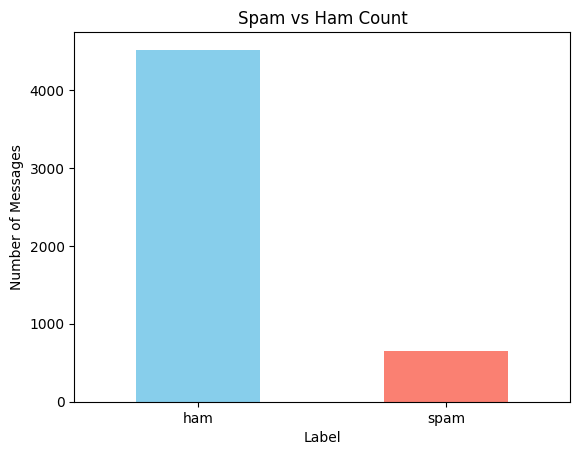

In [10]:
# Count ham and spam
counts = data['v1'].value_counts()

# Plot
counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Spam vs Ham Count')
plt.xlabel('Label')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

In [11]:
data["v1"].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

In [12]:
# convert ham and spam values as 
# data['v1'] = data['v1'].map({'ham': 0, 'spam': 1}) this is trying to replace and make copy.
# so i shopuld use this
data.loc[:, 'v1'] = data['v1'].map({'ham': 0, 'spam': 1})

In [13]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


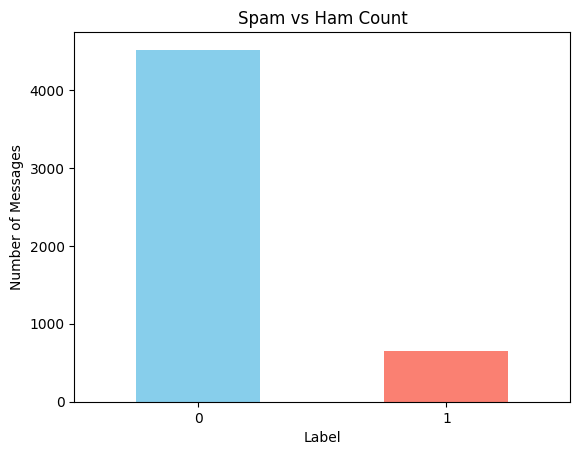

In [14]:
# Count ham and spam
counts = data['v1'].value_counts()

# Plot
counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Spam vs Ham Count')
plt.xlabel('Label')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

In [15]:
data["v1"].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

### Text preprocess

In [16]:
import re
import string

### Convert uppercase to lowercase

In [17]:
data.loc[:, 'v2'] = data['v2'].str.lower()

In [18]:
data["v2"].head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: v2, dtype: object

### remove links

In [19]:
## data["v2"] = data["v2"].apply(lambda x: re.sub(r"http\S+|www.\S+", "", x))
data.loc[:, "v2"] = data["v2"].apply(lambda x: re.sub(r"http\S+|www.\S+", "", x))

In [20]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"go until jurong point, crazy.. available only ...",NaN,NaN,NaN
1,0,ok lar... joking wif u oni...,NaN,NaN,NaN
2,1,free entry in 2 a wkly comp to win fa cup fina...,NaN,NaN,NaN
3,0,u dun say so early hor... u c already then say...,NaN,NaN,NaN
4,0,"nah i don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,will ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"pity, * was in mood for that. so...any other s...",NaN,NaN,NaN
5570,0,the guy did some bitching but i acted like i'd...,NaN,NaN,NaN


### remove punctuations

In [21]:
# def remove_punctuations(text):
#     for punctuation in string.punctuation:
#         if (text == punctuation):
#             text = text.replace(punctuation, "")

#     return text

# data.loc[:, "v2"] = data["v2"].apply(remove_punctuations)  didn't worked as i expected


import re
import string

def remove_punctuations(text):
    if isinstance(text, str):
        return re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    else:
        return ""  # or return text, or np.nan, depending on your use case

data.loc[:, "v2"] = data["v2"].apply(remove_punctuations)




In [22]:
data["v2"].isnull().sum()

np.int64(0)

In [23]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,go until jurong point crazy available only in ...,NaN,NaN,NaN
1,0,ok lar joking wif u oni,NaN,NaN,NaN
2,1,free entry in 2 a wkly comp to win fa cup fina...,NaN,NaN,NaN
3,0,u dun say so early hor u c already then say,NaN,NaN,NaN
4,0,nah i dont think he goes to usf he lives aroun...,NaN,NaN,NaN
...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,will ì b going to esplanade fr home,NaN,NaN,NaN
5569,0,pity was in mood for that soany other suggest...,NaN,NaN,NaN
5570,0,the guy did some bitching but i acted like id ...,NaN,NaN,NaN


In [24]:
data["v2"].isnull().sum()

np.int64(0)

### remove numbers

In [25]:
import re

data.loc[:, "v2"] = data["v2"].apply(lambda x: re.sub(r'\d+', '', x))

In [26]:
data["v2"].isnull().sum()

np.int64(0)

### remove stop words

In [27]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [28]:
import nltk  # natural language toolkit
nltk.download('stopwords', download_dir="../artifacts")

[nltk_data] Downloading package stopwords to ../artifacts...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
with open("../artifacts/corpora/stopwords/english", "r") as file:
    stwords = file.read().splitlines()

stwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
data.loc[:, "v2"] = data["v2"].apply(
    lambda x: " ".join(word for word in x.split() if word.lower() not in stwords)
)


In [31]:
data["v2"].isnull().sum()

np.int64(0)

In [32]:
data["v2"].head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: v2, dtype: object

## STEMMING(take the base words)

In [33]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [34]:
data.loc[:, "v2"] = data["v2"].apply(
    lambda x: " ".join(stemmer.stem(x) for x in x.split())
)

In [35]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,go jurong point crazi avail bugi n great world...,NaN,NaN,NaN
1,0,ok lar joke wif u oni,NaN,NaN,NaN
2,1,free entri wkli comp win fa cup final tkt st m...,NaN,NaN,NaN
3,0,u dun say earli hor u c alreadi say,NaN,NaN,NaN
4,0,nah dont think goe usf live around though,NaN,NaN,NaN
5,1,freemsg hey darl week word back id like fun st...,NaN,NaN,NaN
6,0,even brother like speak treat like aid patent,NaN,NaN,NaN
7,0,per request mell mell oru minnaminungint nurun...,NaN,NaN,NaN
8,1,winner valu network custom select receivea å£ ...,NaN,NaN,NaN
9,1,mobil month u r entitl updat latest colour mob...,NaN,NaN,NaN


## Building vocabulary

In [36]:
from collections import Counter
vocab = Counter()  # we can use this module for count unique words

In [37]:
for sentence in data["v2"]:
    print(sentence)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
free entri wkli comp win fa cup final tkt st may text fa receiv entri questionstd txt ratetc appli over
u dun say earli hor u c alreadi say
nah dont think goe usf live around though
freemsg hey darl week word back id like fun still tb ok xxx std chg send å£ rcv
even brother like speak treat like aid patent
per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun
winner valu network custom select receivea å£ prize reward claim call claim code kl valid hour
mobil month u r entitl updat latest colour mobil camera free call mobil updat co free
im gonna home soon dont want talk stuff anymor tonight k ive cri enough today
six chanc win cash pound txt csh send cost pday day tsandc appli repli hl info
urgent week free membership å£ prize jackpot txt word claim tc lccltd pobox ldnwarw
ive search right word thank breather promis wont take help grant f

In [38]:
for sentence in data["v2"]:
    vocab.update(sentence.split())

In [39]:
vocab

Counter({'u': 1020,
         'call': 555,
         'im': 450,
         'go': 437,
         'get': 427,
         'ur': 316,
         'come': 277,
         'dont': 258,
         'ltgt': 254,
         'ok': 251,
         'know': 251,
         'free': 245,
         'like': 244,
         'want': 238,
         'got': 232,
         'time': 230,
         'day': 227,
         'å£': 226,
         'love': 221,
         'good': 218,
         'text': 207,
         'ill': 207,
         'need': 182,
         'send': 179,
         'one': 173,
         'see': 162,
         'think': 161,
         'lor': 157,
         'home': 153,
         'take': 153,
         'today': 152,
         'txt': 150,
         'stop': 148,
         'back': 146,
         'still': 146,
         'tell': 146,
         'repli': 142,
         'make': 140,
         'r': 139,
         'well': 129,
         'mobil': 128,
         'say': 127,
         'hi': 127,
         'n': 126,
         'da': 126,
         'ask': 126,
         'phone

In [40]:
len(vocab)

7087

In [41]:
# features count is more than records. so this will be overfit. need to reduce the count of features.

In [42]:
tokens = [key for key in vocab if vocab[key] > 10]

In [43]:
len(tokens)

741

In [44]:
# we need to save our new reduced vocab in somewhere
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close

save_vocabulary(tokens, '../artifacts/vocabulary.txt')

### Devide dataset

In [45]:
x = data["v2"]
y = data["v1"]

In [46]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

In [48]:
y_test.shape

(1034,)

### Vectorization

In [49]:
def vectorizor(data_set, vocabulary):
    vectorized_list = []

    for sentence in data_set:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)

    return vectorized_list_new

In [50]:
vectorized_x_train = vectorizor(x_train, tokens)

In [51]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [52]:
vectorized_x_test = vectorizor(x_test, tokens)

### Handle Imbalance DataSet

In [53]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [55]:
y_train.value_counts()

v1
0    3613
1     522
Name: count, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

y_train = y_train.astype(int)
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(7226, 741) (7226,)


In [58]:
y_train_smote.value_counts()

v1
0    3613
1    3613
Name: count, dtype: int64

### MODEL TRAINING AND EVALUATION

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Training scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Training scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")

# Logistic regresion

In [62]:
# Create and train the model:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

# Predict on training data:
y_train_pred = lr.predict(vectorized_x_train_smote)

# Predict on test data:
y_test_pred = lr.predict(vectorized_x_test)

# Preprocess y_test and y_test_pred to ensure correct shape and dtype:
if hasattr(y_test, "values"):
    y_test = y_test.values.ravel()
y_test = y_test.astype(int)
y_test_pred = y_test_pred.astype(int)

# Print training scores:
training_scores(y_train_smote, y_train_pred)

# Print validation scores:
validation_scores(y_test, y_test_pred)

Training scores:
	Accuracy = 0.976
	Precision = 0.984
	Recall = 0.968
	F1-Score = 0.976
Training scores:
	Accuracy = 0.967
	Precision = 0.826
	Recall = 0.939
	F1-Score = 0.879


# MultinomialNB

In [63]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

# Predict on training data:
y_train_pred = mnb.predict(vectorized_x_train_smote)

# Predict on test data:
y_test_pred = mnb.predict(vectorized_x_test)

if hasattr(y_test, "values"):
    y_test = y_test.values.ravel()
y_test = y_test.astype(int)
y_test_pred = y_test_pred.astype(int)

# Print training scores:
training_scores(y_train_smote, y_train_pred)

# Print validation scores:
validation_scores(y_test, y_test_pred)

Training scores:
	Accuracy = 0.956
	Precision = 0.96
	Recall = 0.952
	F1-Score = 0.956
Training scores:
	Accuracy = 0.955
	Precision = 0.766
	Recall = 0.924
	F1-Score = 0.837


# Decision tree

In [64]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

# Predict on training data:
y_train_pred = dt.predict(vectorized_x_train_smote)

# Predict on test data:
y_test_pred = dt.predict(vectorized_x_test)

if hasattr(y_test, "values"):
    y_test = y_test.values.ravel()
y_test = y_test.astype(int)
y_test_pred = y_test_pred.astype(int)

# Print training scores:
training_scores(y_train_smote, y_train_pred)

# Print validation scores:
validation_scores(y_test, y_test_pred)

Training scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Training scores:
	Accuracy = 0.952
	Precision = 0.84
	Recall = 0.763
	F1-Score = 0.8


# Random Forest

In [65]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

# Predict on training data:
y_train_pred = rf.predict(vectorized_x_train_smote)

# Predict on test data:
y_test_pred = rf.predict(vectorized_x_test)

if hasattr(y_test, "values"):
    y_test = y_test.values.ravel()
y_test = y_test.astype(int)
y_test_pred = y_test_pred.astype(int)

# Print training scores:
training_scores(y_train_smote, y_train_pred)

# Print validation scores:
validation_scores(y_test, y_test_pred)

Training scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Training scores:
	Accuracy = 0.975
	Precision = 0.941
	Recall = 0.855
	F1-Score = 0.896


# Support Vector Machine

In [66]:
svm = DecisionTreeClassifier()
svm.fit(vectorized_x_train_smote, y_train_smote)

# Predict on training data:
y_train_pred = svm.predict(vectorized_x_train_smote)

# Predict on test data:
y_test_pred = svm.predict(vectorized_x_test)

if hasattr(y_test, "values"):
    y_test = y_test.values.ravel()
y_test = y_test.astype(int)
y_test_pred = y_test_pred.astype(int)

# Print training scores:
training_scores(y_train_smote, y_train_pred)

# Print validation scores:
validation_scores(y_test, y_test_pred)

Training scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Training scores:
	Accuracy = 0.951
	Precision = 0.828
	Recall = 0.771
	F1-Score = 0.798


In [67]:
# So as we can see logistic regression model is the best for this.

# Save Model

In [68]:
import pickle

with open("../artifacts/model/model.pickle", "wb") as file:
    pickle.dump(lr, file)